In [86]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os 

In [87]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [88]:
img_width = 50
img_height = 50
batch_size = 64

In [89]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    #data_format="channels_last",
    validation_split=0.2,
)

train_generator = datagen.flow_from_directory(
    "PetImages/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=True,
    subset="training",
    seed=123,
)

val_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

validation_generator = datagen.flow_from_directory(
    "PetImages/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=True,
    subset="validation",
    seed=123,
)

Found 19957 images belonging to 2 classes.
Found 4989 images belonging to 2 classes.


In [76]:
print(train_generator.image_shape)

idx_to_classes ={key:val for key,val in dict(train_generator.class_indices).items()}
idx_to_classes

(50, 50, 1)


{'Cat': 0, 'Dog': 1}

In [63]:
model = keras.Sequential ([
    layers.Input((50,50,1)),
    layers.Conv2D(32,(3,3),padding = 'same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(16,(3,3),padding = 'same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.5),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation ='relu'),
    
    layers.Dense(2),
])

In [90]:
#steps
train_steps = len(train_generator)
validation_steps = len(validation_generator)

In [68]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
    metrics=["accuracy"],
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation_14 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 16)        4624      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 16)      

In [65]:
history = model.fit(
            train_generator,
            epochs=10,
            steps_per_epoch=train_steps,
            validation_data=validation_generator,
            validation_steps=validation_steps,
)

Epoch 1/10
267/624 [===========>..................] - ETA: 41s - loss: 0.6938 - accuracy: 0.5083

c:\Users\USER\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - 89s 141ms/step - loss: 0.6878 - accuracy: 0.5408 - val_loss: 0.6779 - val_accuracy: 0.5697
Epoch 2/10
624/624 [==============================] - 87s 140ms/step - loss: 0.6820 - accuracy: 0.5663 - val_loss: 0.6748 - val_accuracy: 0.5847
Epoch 3/10
624/624 [==============================] - 94s 150ms/step - loss: 0.6697 - accuracy: 0.5907 - val_loss: 0.6514 - val_accuracy: 0.6196
Epoch 4/10
624/624 [==============================] - 95s 153ms/step - loss: 0.6510 - accuracy: 0.6230 - val_loss: 0.6296 - val_accuracy: 0.6448
Epoch 5/10
624/624 [==============================] - 96s 153ms/step - loss: 0.6369 - accuracy: 0.6362 - val_loss: 0.6213 - val_accuracy: 0.6534
Epoch 6/10
624/624 [==============================] - 100s 160ms/step - loss: 0.6343 - accuracy: 0.6435 - val_loss: 0.6260 - val_accuracy: 0.6542
Epoch 7/10
624/624 [==============================] - 111s 177ms/step - loss: 0.6284 - accuracy: 0.6472 - val_loss: 0.6163 - val_accuracy: 0

######################################################################################################

In [91]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(50,50,1),kernel_initializer = 'orthogonal'))
#model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))

model.add(Dense(2))



In [92]:
model.compile(
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
    optimizer='adam',
    metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_22 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 16)        4624      
                                                                 
 batch_normalization_9 (Batc  (None, 22, 22, 16)     

 flatten_11 (Flatten)        (None, 1936)              0         
                                                                 
 dropout_28 (Dropout)        (None, 1936)              0         
                                                                 
 dense_33 (Dense)            (None, 100)               193700    
                                                                 
 dropout_29 (Dropout)        (None, 100)               0         
                                                                 
 dense_34 (Dense)            (None, 64)                6464      
                                                                 
 dense_35 (Dense)            (None, 2)                 130       
                                                                 
Total params: 205,430
Trainable params: 205,334
Non-trainable params: 96
_________________________________________________________________


In [93]:
history = model.fit(
            train_generator,
            epochs=10,
            steps_per_epoch=train_steps,
            validation_data=validation_generator,
            validation_steps=validation_steps,
)

Epoch 1/10
312/312 [==============================] - 99s 313ms/step - loss: 0.7082 - accuracy: 0.5461 - val_loss: 0.7048 - val_accuracy: 0.5033
Epoch 2/10
312/312 [==============================] - 109s 348ms/step - loss: 0.6643 - accuracy: 0.5995 - val_loss: 0.6537 - val_accuracy: 0.6268
Epoch 3/10
312/312 [==============================] - 116s 372ms/step - loss: 0.6546 - accuracy: 0.6070 - val_loss: 0.7065 - val_accuracy: 0.5484
Epoch 4/10
312/312 [==============================] - 111s 355ms/step - loss: 0.6470 - accuracy: 0.6207 - val_loss: 0.6309 - val_accuracy: 0.6462
Epoch 5/10
312/312 [==============================] - 109s 350ms/step - loss: 0.6349 - accuracy: 0.6337 - val_loss: 0.7864 - val_accuracy: 0.5644
Epoch 6/10
312/312 [==============================] - 111s 357ms/step - loss: 0.6310 - accuracy: 0.6350 - val_loss: 0.6200 - val_accuracy: 0.6498
Epoch 7/10
312/312 [==============================] - 109s 349ms/step - loss: 0.6264 - accuracy: 0.6451 - val_loss: 0.6282 - 

Model Metrics

In [95]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
test_loss = history.history["val_loss"]
test_accuracy = history.history["val_accuracy"]

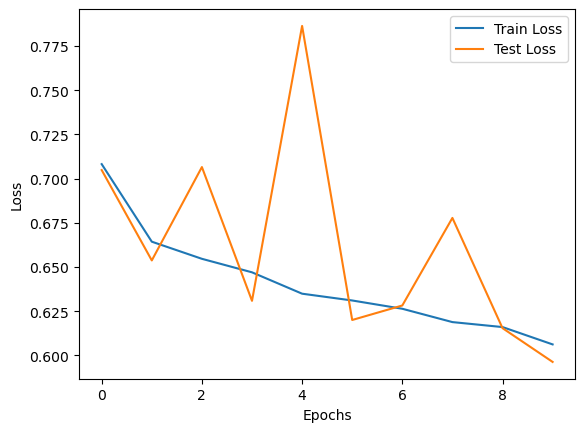

In [96]:
plt.plot(range(10), train_loss, label = "Train Loss")
plt.plot(range(10), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

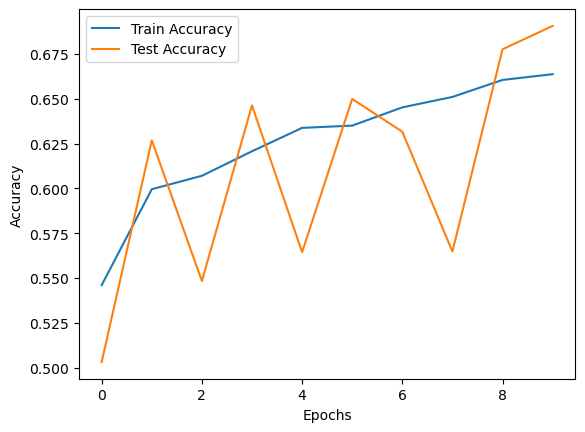

In [98]:
plt.plot(range(10), train_accuracy, label = "Train Accuracy")
plt.plot(range(10), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()